<center><img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="180"></center>

<center>
    
#               #          Exploratory Data Analysis on IPL </center>


<center><img src="https://user-images.githubusercontent.com/71230247/93026939-51843e00-f627-11ea-8c2d-ea10480dd1e8.jpg" width="480" height="360"></center>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br><br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br><br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis Based on Overall Player Performances**](#section501)<br>
    - 5.1.1 [Which Player received highest Player of Match awards?](#section50101)<br><br>
  - 5.2 [**Analysis Based on Batting Performances**](#section502)<br>
      - 5.2.1 [Who is the highest run getter?](#section50201)<br>
      - 5.2.2 [Which batsman has the best strike rate](#section50202)<br>
      - 5.2.3 [Which batsman has the best batting average?](#section50203)<br>
      - 5.2.4 [Overall Batting Performance Comparison of top 10 run getters in IPL](#section50204)<br><br>
  - 5.3 [**Analysis Based on Bowling Performances**](#section503)<br>
    - 5.3.1 [Who is the highest wicket taker?](#section50301)<br>
    - 5.3.2 [Which bowler has the best strike rate?](#section50302)<br>
    - 5.3.3 [Which bowler has the best bowling average?](#section50303)<br>
    - 5.3.4 [Which bowler has the best economy rate?](#section50304)<br>
    - 5.3.5 [Overall Bowling Performance Comparison of top 10 wicket takers](#section50305)<br><br>
  - 5.4 [**Analysis Based on Fielding Performances**](#section504)<br>
    - 5.4.1 [Which fielder has the taken the maximum number of catches](#section50401)<br><br>
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

**The Indian Premier League (IPL)** is a professional Twenty20 cricket league in India contested during March or April and May of every year by **eight teams representing eight different cities in India.** The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL is the **most-attended cricket league in the world.** By analysing the players on different aspects like **Batting, Bowling and Fielding**, let us try to find the **value they add to their teams** and thus the role they play in winning the tournament.
<br> <center><img src = 'https://user-images.githubusercontent.com/71230247/93027270-6366e080-f629-11ea-85f0-6b840278d85b.jpg' width="360" height="270"></center>

<a id=section2></a>
## 2. Importing Packages

In [13]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [15]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\anoop.painuly\appdata\local\continuum\anaconda3\lib\site-packages (4.11.0)


In [16]:
# Making plotly specific imports

# pip install chart-studio

import plotly.graph_objs as go

### Disclaimer: The images are only for illustration purpose.

<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using two datasets about **IPL**.

.
<center><img src="https://user-images.githubusercontent.com/71230247/93027663-0a4c7c00-f62c-11ea-9604-7c98466346e1.jpg" width=600 height=400><br/></center>

1. **Match Details** dataset: This dataset contains information about the **matches played** in every season from **2008 to 2018** in the **IPL(Indian Premiere League)**.

2. **Delivery Details** dataset: This dataset contains **Delivery Level Detail(ball by ball)** for every season from **2008 to 2018** in the **IPL(Indian Premiere League)**.

### Importing 1st Dataset

In [95]:
# Importing the 1st dataset (Match Details for IPL season wise dataset).

df_match = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv')
df_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id=section301></a>
### Description of the Dataset

- This dataset provides a **match analysis** of different of different matches played in **IPL** from **2008 to 2018**, including Season, Date, Venue, Teams, Toss Result, Toss Decision, Match Result, Man of the Match, and Umpires.


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| ID                             | Unique Id for every match.                                                                 | 
| season                         | IPM Season Year.                                                                           | 
| city                           | Venue City.                                                                                | 
| date                           | Date of the Match.                                                                         |
| team1                          | First Team.                                                                                |
| team2                          | Second Team.                                                                               |
| toss_winner                    | Winner of the match toss.                                                                  |
| toss_decision                  | Batting or Bowling decision by Toss Winner.                                                |
| result                         | Normal/Tie/No Result.                                                                      |
| dl_applied                     | DL Method applied for the result.                                                          |
| winner                         | Match Winner.                                                                              |
| win_by_runs                    | Win by Runs.                                                                               |
| win_by_wickets                 | Win by Wickets.                                                                            |
| player_of_match                | Man of the Match.                                                                          |
| venue                          | Venue Stadium.                                                                             |
| umpire1                        | First Ground Umpire.                                                                       |
| umpire2                        | Second Ground Umpire.                                                                      |
| umpire3                        | Third Umpire.                                                                              |

<br> 
<center><img src="https://user-images.githubusercontent.com/71230247/93169978-ec723a80-f743-11ea-9a74-1842e30e0871.jpg" width=500 height=350><br/></center>

In [7]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

- ```info``` function gives us the following insights into the df_match dataframe:

  - There are a total of **696 samples (rows)** and **18 columns** in the dataframe.
  
  - There are **5 columns** with a **numeric** datatype and **13 columns** with an **object** datatype.
  
  - There are **7 missing** values in the **city** column, **3 missing** values in the **winner** column, and **636 missing** values in the **umpire3** column

### Importing 2nd Dataset

In [96]:
# Importing the 2nd dataset (IPL's Delivery Level(Ball by Ball) Information for all the seasons(2008-18)).

df_ball = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv')
df_ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


### Description of the Dataset

- This dataset provides information of **ball by ball details** in the **IPL seasons(2008-18)** like their over, ball, batsman, total runs, player dismissed, dismissal kind, fielder, etc.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| match_id                       | Unique Id for every match.                                                                 | 
| inning                         | Innings of the Match(1st or second).                                                       | 
| batting_team                   | Batting Team.                                                                              | 
| bowling_team                   | Bowling Team.                                                                              |
| over                           | Over number of the Innings.                                                                |
| ball                           | Ball Sequence of the Over.                                                                 |
| batsman                        | Batsman facing the ball.                                                                   |
| non_striker                    | Batsman at the non-striker end.                                                            |
| bowler                         | Bowler bowling the delivery.                                                               |
| is_super_over                  | If this is a Super Over(Yes/No)?                                                           |
| wide_runs                      | Runs conceded on the Wide Ball.                                                            |
| bye_runs                       | Runs conceded as bye.                                                                      | 
| legbye_runs                    | Runs conceded as leg bye.                                                                  |
| noball_runs                    | Runs conceded on No Ball.                                                                  |
| penalty_runs                   | Penalty Runs conceded on the Ball.                                                         |
| batsman_runs                   | Runs scored by Batsman on the Ball.                                                        |
| extra_runs                     | Total extra runs scored on the Ball.                                                       |
| total_runs                     | Total runs scored on the Ball.                                                             |
| player_dismissed               | Batsman who got out on the Ball.                                                           |
| dismissal_kind                 | Dismissal Type.                                                                            |
| fielder                        | Fielder who contributed to the dismissal.                                                  |

<br> 
<center><img src="https://user-images.githubusercontent.com/71230247/93261684-b0c98600-f7c0-11ea-8653-7edb7b770be4.jpg" width=600 height=420><br/><center>

In [13]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

- ```info``` function gives us the following insights into the df_store dataframe:

  - There are a total of **164750 samples (rows)** and **21 columns** in the dataframe.
  
  - There are **13 columns** with a **numeric** datatype and **8 columns** with an **object** datatype.
  
  - There are **missing** values in the **player_dismissed**, **dismissal_kind**, and **fielder** column.

We are going to perform a **merge** on the **two dataframes**, **df_match and df_ball** on the basis of **id** of **df_match** dataframe and **match_id** column of **df_ball** dataframe to create a new dataframe **df_merge**, in order to make our **EDA** easier.

- Since both the **datasets have same number of unique values** present **in** the **id** and **match_id**, we can **perform** a **One-to-Many merge**.

In [19]:
df_merge = pd.merge(df_match, df_ball, how='outer', left_on='id', right_on='match_id').drop(['match_id'], 1)
df_merge.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


### Understading the Datasets

In [15]:
df_merge[df_merge.dl_applied == 1].head(2)
# Matches where DL rule was applied to arrive to a result

df_merge.result.unique() #'normal', 'tie', 'no result'

df_merge[df_merge.result == 'normal'].head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [84]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164750 entries, 0 to 164749
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                164750 non-null  int64 
 1   season            164750 non-null  int64 
 2   city              163050 non-null  object
 3   date              164750 non-null  object
 4   team1             164750 non-null  object
 5   team2             164750 non-null  object
 6   toss_winner       164750 non-null  object
 7   toss_decision     164750 non-null  object
 8   result            164750 non-null  object
 9   dl_applied        164750 non-null  int64 
 10  winner            164429 non-null  object
 11  win_by_runs       164750 non-null  int64 
 12  win_by_wickets    164750 non-null  int64 
 13  player_of_match   164429 non-null  object
 14  venue             164750 non-null  object
 15  umpire1           164502 non-null  object
 16  umpire2           164502 non-null  obj

- ```info``` function gives us the following insights into the df_merge dataframe:

  - There are a total of **164750 samples (rows)** and **39 columns** in the dataframe.
  
  - There are **18 columns** with a **numeric** datatype and **21 columns** with an **object** datatype.
  
  - There are **missing** values in the **city, winner, player_of_match, umpire1, umpire2, umpire3, player_dismissed, dismissal_kind, fielder** column.

In [97]:
df_merge.describe(include = 'all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,164750.000000,164750.000000,164750,164750,164750,164750,164750,164750,164750,164750.000000,164429,164750.000000,164750.000000,164429,164750,164502,164502,14290,164750.000000,164750,164750,164750.000000,164750.000000,164750,164750,164750,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,8157,8157,6129
unique,NaN,NaN,33,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18,NaN,14,14,NaN,NaN,488,484,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464,9,484
top,NaN,NaN,Mumbai,2009-04-23,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,KD Karthik
freq,NaN,NaN,22591,513,22019,21224,21577,97308,162601,NaN,23634,NaN,NaN,4697,16872,17486,13475,1446,NaN,20673,20573,NaN,NaN,3879,3832,3182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,4861,145
mean,977.951757,2012.961360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019472,NaN,13.589663,3.254161,NaN,NaN,NaN,NaN,NaN,1.482307,NaN,NaN,10.151879,3.616243,NaN,NaN,NaN,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129,NaN,NaN,NaN
std,2147.671843,3.063119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138177,NaN,23.381121,3.368754,NaN,NaN,NaN,NaN,NaN,0.501592,NaN,NaN,5.675666,1.807398,NaN,NaN,NaN,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,175.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,349.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,521.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [20]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\anoop.painuly\appdata\local\continuum\anaconda3\lib\site-packages (2.9.0)


In [100]:
import pandas_profiling

In [101]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_merge.profile_report(title="IPL's Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="IPL_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 38
- Number of observations: 164750
- Missing cells: 625316 (10%)

__Variables types__: 
- Numeric = 16
- Categorical = 10
- Text (Unique) = 3
- Rejected = 4
<br>

- **date** has a **high cardinality (498 distinct values)**.

- **player_of_match** has a **high cardinality (498 distinct values)**.

- **umpire1** has a **high cardinality (55 distinct values)**.

- **umpire2** has a **high cardinality (58 distinct values)**.

- **batsman** has a **high cardinality (488 distinct values)**.

- **non_striker** has a **high cardinality (484 distinct values)**.

- **bowler** has a **high cardinality (37fielder8 distinct values)**.

- **player_dismissed** has a **high cardinality (464 distinct values)**.

- **fielder** has a **high cardinality (476 distinct values)**.

- **city** has **1700 (1.0%) missing values**. **All these 1700 cases has venue as "Dubai International Cricket Stadium" , so we can replace the missing value of city by Dubai**

- **umpire3** has **150460 (91.3%) missing values** **Out of the all 11 seasons only 2018 has data for umpire3, but that if fine as we can drop thi column because this will not give any insights on the most valueable player**

- **player_dismissed** has **156593 (95.0%) missing values**.

- **dismissal_kind** has **156593 (95.0%) missing values**.

- **fielder** has **158832 (96.4%) missing values**. **This is ok, as fielder will only be involved where a batsman is dismissed with the contribution of the fielder**

- **bye_runs** has a **skewness** of **30.0515634**

- **noball_runs** has a **skewness** of **24.97400437**

- **win_by_runs** has **88526 (53.7%) zeros**

- **win_by_wickets** has **78373 (47.6%) zeros**

- **bye_runs** has **164302 (99.7%) zeros**

- **legbye_runs** has **161989 (98.3%) zeros**

- **noball_runs** has **164093 (99.6%) zeros**

- **noball_runs** has **164093 (99.6%) zeros**

- **batsman_runs** has **65904 (40.0%) zeros**

- **extra_runs** has **155872 (94.6%) zeros**

- **total_runs** has **58061 (35.2%) zeros**

In [21]:
# df_ball.info()
# df_match[df_match['umpire3'].notnull()].season.unique()
# df_match[df_match['season']==2018].city.unique()

# df_ball[df_ball['fielder'].isnull() & df_ball['player_dismissed'].notnull()].head()

# df_merge[df_merge['id']==1].umpire2.unique()

df_match[(df_match['win_by_runs'] == 0) & (df_match['win_by_wickets'] == 0)].head() #no result or tie matches
df_match.head(2) #696
# df_match[df_match['win_by_runs']==0] #381
# df_match[df_match['win_by_wickets']==0] #325

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [266]:
df_merge.head()
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164750 entries, 0 to 164749
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                164750 non-null  int64 
 1   season            164750 non-null  int64 
 2   city              163050 non-null  object
 3   date              164750 non-null  object
 4   team1             164750 non-null  object
 5   team2             164750 non-null  object
 6   toss_winner       164750 non-null  object
 7   toss_decision     164750 non-null  object
 8   result            164750 non-null  object
 9   dl_applied        164750 non-null  int64 
 10  winner            164429 non-null  object
 11  win_by_runs       164750 non-null  int64 
 12  win_by_wickets    164750 non-null  int64 
 13  player_of_match   164429 non-null  object
 14  venue             164750 non-null  object
 15  umpire1           164502 non-null  object
 16  umpire2           164502 non-null  obj

- Also the columns **date, umpire1, umpire2, umpire3** will be **dropped** because they **don't provide** any additional **insights** into the data.

In [103]:
# df_merge.drop(['date', 'umpire1', 'umpire2', 'umpire3',], 1,inplace = True)
df_merge.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


- **city** has **1700 missing values**, all these 1700 cases has venue as **"Dubai International Cricket Stadium"** , so we can replace the missing value of city by **Dubai**

In [23]:
df_merge[df_merge['city'].isnull()] 
#1700 Null Values

df_merge[df_merge['city'].isnull()].venue.unique()
#all the missing city column has 'Dubai International Cricket Stadium' as venue

df_merge[df_merge['venue'] == 'Dubai International Cricket Stadium']['city'].unique() 
#all the venue of 'Dubai International Cricket Stadium' have missing city value

# df_merge['city'] = 'Dubai'
df_merge.loc[(df_merge['venue'] == 'Dubai International Cricket Stadium') ,'city'] = 'Dubai'

- in the cases of caught and bowled, **fielder** has **211 missing values**, all these 211 cases, **fielder** , needs to be replaced as **bowler**

In [24]:
#Different types of dismissals
df_merge[df_merge.player_dismissed.notnull()].dismissal_kind.unique()
# 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled','stumped', 
# 'retired hurt', 'hit wicket', 'obstructing the field'

# cases where dismissal_kind is 'caught and bowled'
df_merge[df_merge.dismissal_kind.isin([ 'caught and bowled'])].head() #211 cases

# Updating the cases where dismissal_kind is 'caught and bowled'
df_merge.loc[(df_merge['dismissal_kind'] == 'caught and bowled') ,'fielder'] = df_merge['bowler']

In [20]:
df_merge.isnull().sum()
# df_merge[df_merge['winner'].isnull()]
# df_merge[df_merge['player_dismissed'].isnull()]
# df_merge[df_merge['dismissal_kind'].isnull()]
# df_merge[df_merge['winner'].isnull()]

id                       0
season                   0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 321
win_by_runs              0
win_by_wickets           0
player_of_match        321
venue                    0
umpire1                248
umpire2                248
umpire3             150460
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
f

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [102]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = df_merge.profile_report(title="IPL's Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="IPL's Profiling_after_preprocessing.html")

---

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section501></a>
## 5.1 Analysis Based on Overall Player Performances

<a id=section50101></a>
### 5.1.1 Which Player received highest Player of Match awards?

In [21]:
# df_mom = df_merge.groupby(['id','player_of_match'])['player_of_match'].agg(['count'])
# df_mom
# df_momcount = df_mom.reset_index(level=1, inplace=False).drop(['count'], 1)
# df_momcount.groupby(['player_of_match'])['player_of_match'].agg(['count']).sort_values("count",ascending = False)
df_match.player_of_match.value_counts().head(10)

CH Gayle          20
AB de Villiers    18
YK Pathan         16
RG Sharma         16
DA Warner         15
MS Dhoni          14
SK Raina          14
G Gambhir         13
SR Watson         13
MEK Hussey        12
Name: player_of_match, dtype: int64

Text(0, 0.5, 'Count-Man of the Matches')

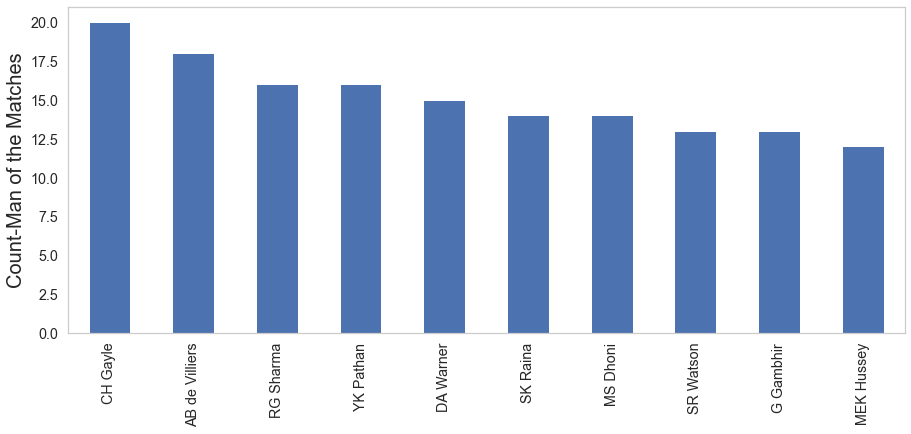

In [51]:
plt.figure(figsize = (15, 6))
df_match['player_of_match'].value_counts().head(10).plot(kind='bar').grid(False)
plt.ylabel('Count-Man of the Matches',fontsize=20)

<a id=section502></a>
## 5.2 Analysis Based on Batting Performances

<a id=section50201></a>
### 5.2.1 Who is the highest run getter?

In [22]:
df_merge.groupby(['batsman'])['batsman_runs'].agg(['sum']).sort_values("sum",ascending = False).head(10)

,sum
batsman,
SK Raina,5014
V Kohli,4962
RG Sharma,4504
G Gambhir,4223
RV Uthappa,4144
S Dhawan,4090
MS Dhoni,4041
CH Gayle,4037
DA Warner,4014


Text(0.5, 0, 'Batsman')

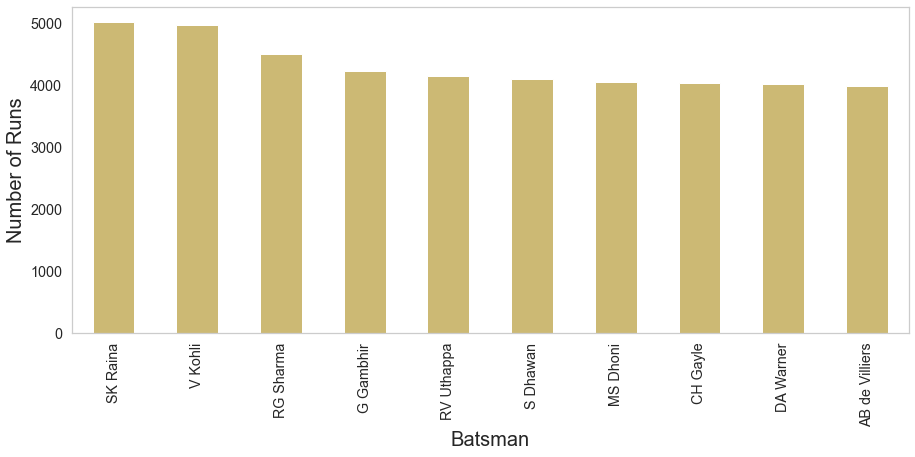

In [54]:
Runs = df_merge.groupby(['batsman'])['batsman_runs'].agg(['sum']).sort_values("sum",ascending = False).head(10)
plt.figure(figsize = (15, 6))
Runs['sum'].plot(kind='bar', color='y').grid(False)
plt.ylabel('Number of Runs',fontsize=20)
plt.xlabel('Batsman',fontsize=20)

<a id=section50202></a>
### 5.2.2 Which batsman has the best strike rate?

In [57]:
#Best Strike Rate

#Total Runs scored by Batsman
runs = df_merge.groupby(['batsman'])['batsman_runs'].agg(['sum']).sort_values("sum",ascending = False)
runs.reset_index(inplace = True)

# For this analysis, we will only consider the Batsmen who have scored atleast 2000 runs in IPL
runs = runs[runs['sum']>= 2000]

#Balls faced by Batsmen including Wides
bfaced = df_merge.groupby(['batsman'])['batsman'].agg(['count']).sort_values('count',ascending = False)
bfaced.reset_index(inplace = True)

#Wide Balls faced by Batsmen
wfaced = df_merge.groupby(['batsman'])['wide_runs'].agg(['sum']).sort_values('sum',ascending = False)
wfaced.reset_index(inplace = True)

#Total balls faced by Batsmen(excluding wides) for the calculation of 'strike rate'
pd.merge(bfaced,wfaced, on = 'batsman')
total = pd.merge(bfaced,wfaced, on = 'batsman')
total['balls faced'] = total['count'] - total['sum']
total.drop(['count','sum'],axis = 1, inplace = True)

#Strike Rate Calculation
df_strike = pd.merge(runs,total,on = 'batsman', how = 'left')
df_strike['strike_rate'] = (df_strike['sum']/df_strike['balls faced'])*100

#Batsmen with best strike rates having scored 2000 or more runs in IPL
df_strike = df_strike.round(decimals=1)
df_strike.sort_values(by=['strike_rate'], ascending=False).head(10)

,batsman,sum,balls faced,strike_rate
16,V Sehwag,2728,1737,157.1
7,CH Gayle,4037,2634,153.3
9,AB de Villiers,3974,2611,152.2
20,KA Pollard,2492,1694,147.1
12,YK Pathan,3198,2191,146.0
8,DA Warner,4014,2794,143.7
13,SR Watson,3197,2241,142.7
0,SK Raina,5014,3581,140.0
27,AC Gilchrist,2069,1485,139.3
6,MS Dhoni,4041,2903,139.2


Text(0.5, 0, 'Batsman')

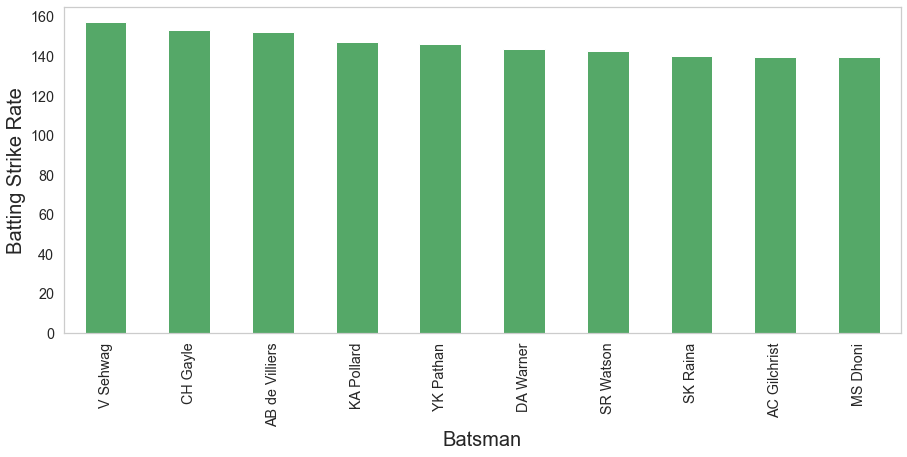

In [59]:
StrikeRate = df_strike.sort_values(by=['strike_rate'], ascending=False).head(10)
StrikeRate.set_index("batsman", inplace = True)
plt.figure(figsize = (15, 6))
StrikeRate['strike_rate'].plot(kind='bar', color='g').grid(False)
plt.ylabel('Batting Strike Rate',fontsize=20)
plt.xlabel('Batsman',fontsize=20)

<a id=section50203></a>
### 5.2.3 Which batsman has the best batting average?

In [60]:
#Best Batting Average

#Total Runs scored by Batsman
runs = df_merge.groupby(['batsman'])['batsman_runs'].agg(['sum']).sort_values("sum",ascending = False)
runs.reset_index(inplace = True)

# For this analysis, we will only consider the Batsmen who have scored atleast 2000 runs in IPL
runs = runs[runs['sum']>= 2000]

#Number of times a player got dismissed in IPL
out = df_merge.groupby(['batsman'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False)
out.reset_index(inplace = True)

#Batting Average Calculation
df_average = pd.merge(runs,out,on = 'batsman', how = 'left')
df_average['average'] = df_average['sum']/df_average['count']

#Batsmen with best batting average having scored 2000 or more runs in IPL
df_average = df_average.round(decimals=2)
df_average.sort_values(by=['average'], ascending=False).head(10)

,batsman,sum,count,average
9,AB de Villiers,3974,94,42.28
28,JP Duminy,2041,49,41.65
7,CH Gayle,4037,98,41.19
8,DA Warner,4014,102,39.35
21,SE Marsh,2489,65,38.29
6,MS Dhoni,4041,112,36.08
1,V Kohli,4962,138,35.96
0,SK Raina,5014,145,34.58
5,S Dhawan,4090,122,33.52
10,AM Rahane,3445,104,33.12


Text(0.5, 0, 'Batsman')

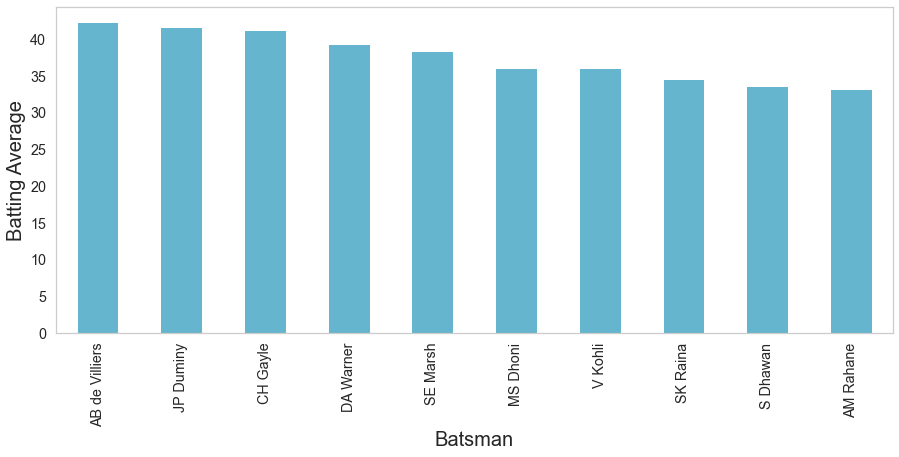

In [61]:
BattingAverage = df_average.sort_values(by=['average'], ascending=False).head(10)
BattingAverage.set_index("batsman", inplace = True)
plt.figure(figsize = (15, 6))
BattingAverage['average'].plot(kind='bar', color='c').grid(False)
plt.ylabel('Batting Average',fontsize=20)
plt.xlabel('Batsman',fontsize=20)

<a id=section50204></a>
### 5.2.4 Overall Batting Performance Comparison of top 10 run getters in IPL?

Text(0.5, 1.0, 'Batting Performance Overall')

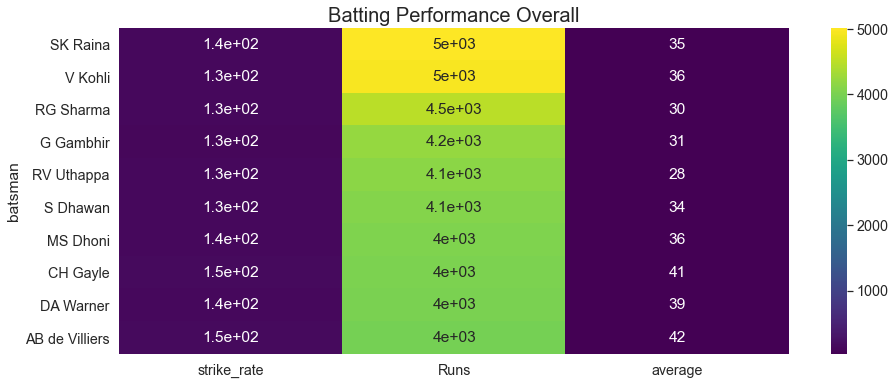

In [79]:
#Overall Batting Performance Comparison of top 10 run getters in IPL

#Total Runs scored by Batsman
runs = df_merge.groupby(['batsman'])['batsman_runs'].agg(['sum']).sort_values("sum",ascending = False)
runs.reset_index(inplace = True)
HighestRuns = runs 
######################################################################################

#Best Strike Rate

#Balls faced by Batsmen including Wides
bfaced = df_merge.groupby(['batsman'])['batsman'].agg(['count']).sort_values('count',ascending = False)
bfaced.reset_index(inplace = True)

#Wide Balls faced by Batsmen
wfaced = df_merge.groupby(['batsman'])['wide_runs'].agg(['sum']).sort_values('sum',ascending = False)
wfaced.reset_index(inplace = True)

#Total balls faced by Batsmen(excluding wides) for the calculation of 'strike rate'
pd.merge(bfaced,wfaced, on = 'batsman')
total = pd.merge(bfaced,wfaced, on = 'batsman')
total['balls faced'] = total['count'] - total['sum']
total.drop(['count','sum'],axis = 1, inplace = True)

#Strike Rate Calculation
df_strike = pd.merge(runs,total,on = 'batsman', how = 'left')
df_strike['strike_rate'] = (df_strike['sum']/df_strike['balls faced'])*100

#Batsmen with best strike rates
df_strike = df_strike.round(decimals=1)

###########################################################################

#Best Batting Average

#Number of times a player got dismissed in IPL
out = df_merge.groupby(['batsman'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False)
out.reset_index(inplace = True)

#Batting Average Calculation
df_average = pd.merge(runs,out,on = 'batsman', how = 'left')
df_average['average'] = df_average['sum']/df_average['count']
df_average = df_average.round(decimals=2)

######################################################################

#Highest Run Getter Table
HighestRuns

# Strike Rate Table
df_strike

# Batting Average Table
df_average

Batsman = pd.merge(HighestRuns,df_strike,on = 'batsman', how = 'inner')
Batsman = pd.merge(Batsman,df_average,on = 'batsman', how = 'inner')

#Renaming Columns
Batsman.rename(columns = {'sum':'Runs'}, inplace = True)

#Dropping redundant Columns
Batsman.drop(['sum_x','sum_y','balls faced','count'], axis = 1,inplace = True) 

Batsman.set_index("batsman", inplace = True)
# Batsman['strike_rate'] = Batsman['strike_rate']/10
# Batsman['Runs'] = Batsman['Runs']/100

plt.figure(figsize=(15, 6))
sns.heatmap(Batsman.head(10), annot=True, cmap='viridis')
plt.title('Batting Performance Overall',fontsize=20)

<a id=section503></a>
## 5.3 Analysis Based on Bowling Performances

<a id=section50301></a>
### 5.3.1 Who is the highest wicket taker?

In [80]:
#Different types of dismissals
df_merge[df_merge.player_dismissed.notnull()].dismissal_kind.unique()
# 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled','stumped', 
# 'retired hurt', 'hit wicket', 'obstructing the field'

# Excluding 'run out', 'retired hurt', 'obstructing the field' to identify wickets taken by bowlers
Wickets = df_merge[(df_merge.player_dismissed.notnull()) & (~df_merge.dismissal_kind.isin(['run out','retired hurt','obstructing the field']))]
Wickets.groupby(['bowler'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False).head(10)

,count
bowler,
SL Malinga,154
A Mishra,146
PP Chawla,139
DJ Bravo,136
Harbhajan Singh,134
B Kumar,120
SP Narine,112
UT Yadav,111
R Ashwin,110


Text(0.5, 0, 'Bowler')

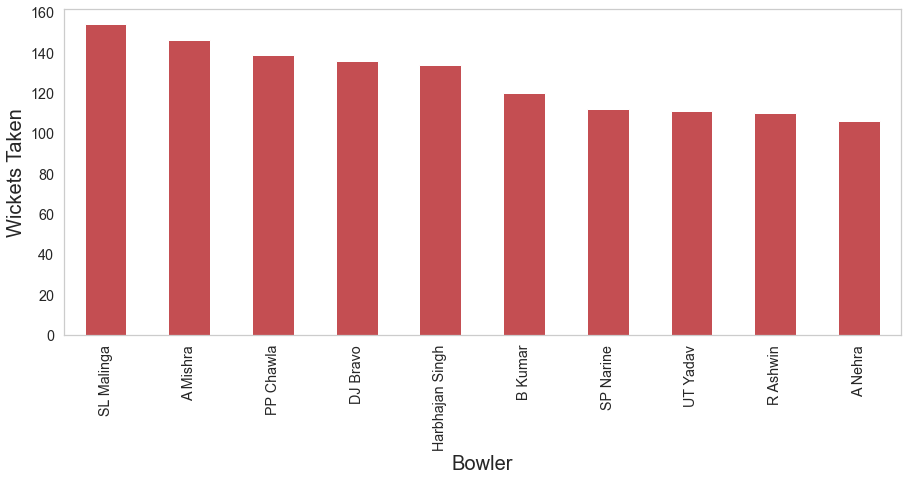

In [81]:
TopWickets = Wickets.groupby(['bowler'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False).head(10)
plt.figure(figsize = (15, 6))
TopWickets['count'].plot(kind='bar', color='r').grid(False)
plt.ylabel('Wickets Taken',fontsize=20)
plt.xlabel('Bowler',fontsize=20)

<a id=section50302></a>
### 5.3.2 Which bowler has the best strike rate?

In [82]:
#Bowling strike rate is defined for a bowler as the average number of balls bowled per wicket taken. 
#The lower the strike rate, the more effective a bowler is at taking wickets quickly.

#Different types of dismissals
df_merge[df_merge.player_dismissed.notnull()].dismissal_kind.unique()
# 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled','stumped', 
# 'retired hurt', 'hit wicket', 'obstructing the field'

# Excluding 'run out', 'retired hurt', 'obstructing the field' to identify wickets taken by bowlers
a = df_merge[(df_merge.player_dismissed.notnull()) & (~df_merge.dismissal_kind.isin(['run out','retired hurt','obstructing the field']))]
Wickets = a.groupby(['bowler'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False)
Wickets.reset_index(inplace = True)

# For this analysis, we will only consider the Bowlers who have taken atleast 100 wickets in IPL
Wickets = Wickets[Wickets['count']>= 100]

#Number of Deliveries bowled by a Bowler
Delivery = df_merge.groupby(['bowler'])['bowler'].agg(['count']).sort_values("count",ascending = False)
Delivery.reset_index(inplace = True)

#Bowling Strike Rate Calculation
df_strike_rate = pd.merge(Wickets,Delivery,on = 'bowler', how = 'left')
df_strike_rate['strike rate'] = df_strike_rate['count_y']/df_strike_rate['count_x']

df_strike_rate = df_strike_rate.round(decimals=2)
df_strike_rate.sort_values("strike rate",ascending = True).head(10)

,bowler,count_x,count_y,strike rate
0,SL Malinga,154,2694,17.49
3,DJ Bravo,136,2448,18.00
9,A Nehra,106,1974,18.62
5,B Kumar,120,2340,19.50
1,A Mishra,146,2929,20.06
6,SP Narine,112,2327,20.78
2,PP Chawla,139,2890,20.79
10,R Vinay Kumar,105,2186,20.82
7,UT Yadav,111,2366,21.32
11,Z Khan,102,2276,22.31


Text(0.5, 0, 'Bowler')

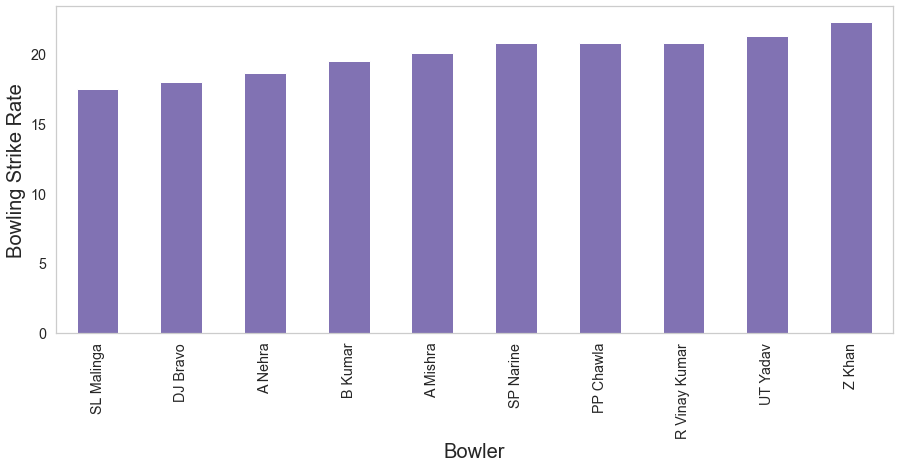

In [83]:
BowlingStrikeRate = df_strike_rate.sort_values("strike rate",ascending = True).head(10)
BowlingStrikeRate.set_index("bowler", inplace = True)
plt.figure(figsize = (15, 6))
BowlingStrikeRate['strike rate'].plot(kind='bar', color='m').grid(False)
plt.ylabel('Bowling Strike Rate',fontsize=20)
plt.xlabel('Bowler',fontsize=20)

<a id=section50303></a>
### 5.3.3 Which bowler has the best bowling average?

In [84]:
#Bowling average is the number of runs a bolwer has conceded per wicket taken. 
#The lower the bowling average is, the better the bowler is performing.

#Different types of dismissals
df_merge[df_merge.player_dismissed.notnull()].dismissal_kind.unique()
# 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled','stumped', 
# 'retired hurt', 'hit wicket', 'obstructing the field'

# Excluding 'run out', 'retired hurt', 'obstructing the field' to identify wickets taken by bowlers
a = df_merge[(df_merge.player_dismissed.notnull()) & (~df_merge.dismissal_kind.isin(['run out','retired hurt','obstructing the field']))]
Wickets = a.groupby(['bowler'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False)
Wickets.reset_index(inplace = True)

# For this analysis, we will only consider the Bowlers who have taken atleast 100 wickets in IPL
Wickets = Wickets[Wickets['count']>= 100]
# Wickets.head()

#Number of Runs conceded by a Bowler
#wide_runs, noball_runs, batsman_runs are all added to the bowler's score.
RunBall = df_merge.groupby(['bowler'])['batsman_runs','wide_runs','noball_runs'].agg('sum')
RunBall.reset_index(inplace = True)
RunBall['Runs Conceded'] = RunBall['wide_runs'] + RunBall['noball_runs'] + RunBall['batsman_runs']
RunBall.drop(['batsman_runs','wide_runs','noball_runs'],axis = 1,inplace = True)

#Bowling Average Calculation
df_average = pd.merge(Wickets,RunBall,on = 'bowler', how = 'left')
df_average['average'] = df_average['Runs Conceded']/df_average['count']
df_average = df_average.round(2)
df_average.sort_values('average',ascending = True).head(10)

,bowler,count,Runs Conceded,average
0,SL Malinga,154,2927,19.01
6,SP Narine,112,2520,22.50
5,B Kumar,120,2705,22.54
9,A Nehra,106,2495,23.54
1,A Mishra,146,3531,24.18
3,DJ Bravo,136,3310,24.34
2,PP Chawla,139,3681,26.48
8,R Ashwin,110,2921,26.55
11,Z Khan,102,2782,27.27
4,Harbhajan Singh,134,3657,27.29


Text(0.5, 0, 'Bowler')

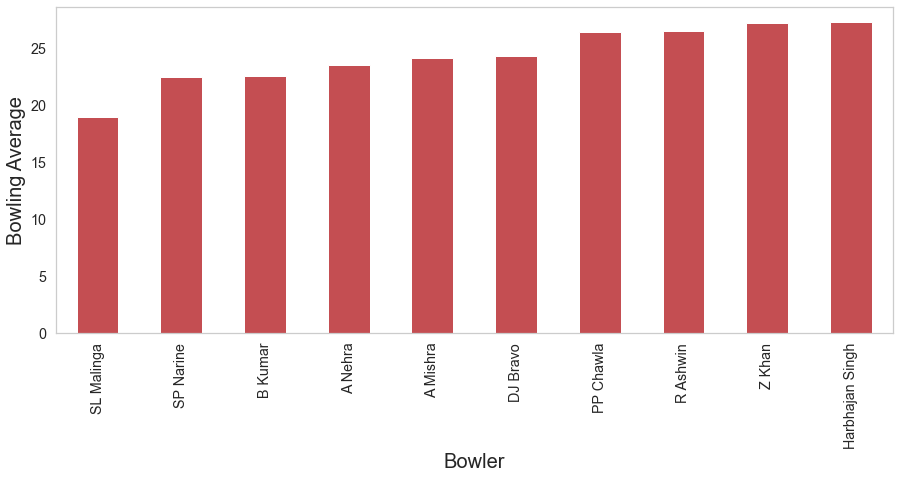

In [87]:
BowlingAverage = df_average.sort_values('average',ascending = True).head(10)
BowlingAverage.set_index("bowler", inplace = True)
plt.figure(figsize = (15, 6))
BowlingAverage['average'].plot(kind='bar', color='r').grid(False)
plt.ylabel('Bowling Average',fontsize=20)
plt.xlabel('Bowler',fontsize=20)

<a id=section50304></a>
### 5.3.4 Which bowler has the best economy rate?

In [88]:
#Economy rate is the number of runs a bowler concedes per over bowled. 
#The lower the economy rate is, the better the bowler is performing.

#Number of Runs conceded by a Bowler
#wide_runs, noball_runs, batsman_runs are all added to the bowler's score.
RunBall = df_merge.groupby(['bowler'])['batsman_runs','wide_runs','noball_runs'].agg('sum')
RunBall.reset_index(inplace = True)
RunBall['Runs Conceded'] = RunBall['wide_runs'] + RunBall['noball_runs'] + RunBall['batsman_runs']
RunBall.drop(['batsman_runs','wide_runs','noball_runs'],axis = 1,inplace = True)
# RunBall.head()

#Number of Deliveries bowled by a Bowler
Delivery = df_merge.groupby(['bowler'])['bowler'].agg(['count']).sort_values("count",ascending = False)
Delivery.reset_index(inplace = True)

# For this analysis, we will only consider the Bowlers who have bowled atleast 2000 deliveries in IPL
Delivery = Delivery[Delivery['count']>= 2000]

#Economy Rate Calculation
df_economy = pd.merge(Delivery,RunBall,on = 'bowler', how = 'left')
df_economy['economy'] = (df_economy['Runs Conceded']/df_economy['count'])*6
df_economy = df_economy.round(2)
df_economy.sort_values('economy',ascending = True).head(10)

,bowler,count,Runs Conceded,economy
13,DW Steyn,2159,2321,6.45
9,SP Narine,2327,2520,6.50
3,SL Malinga,2694,2927,6.52
4,R Ashwin,2673,2921,6.56
0,Harbhajan Singh,3182,3657,6.90
8,B Kumar,2340,2705,6.94
1,A Mishra,2929,3531,7.23
10,Z Khan,2276,2782,7.33
5,P Kumar,2637,3251,7.40
15,IK Pathan,2113,2649,7.52


Text(0.5, 0, 'Bowler')

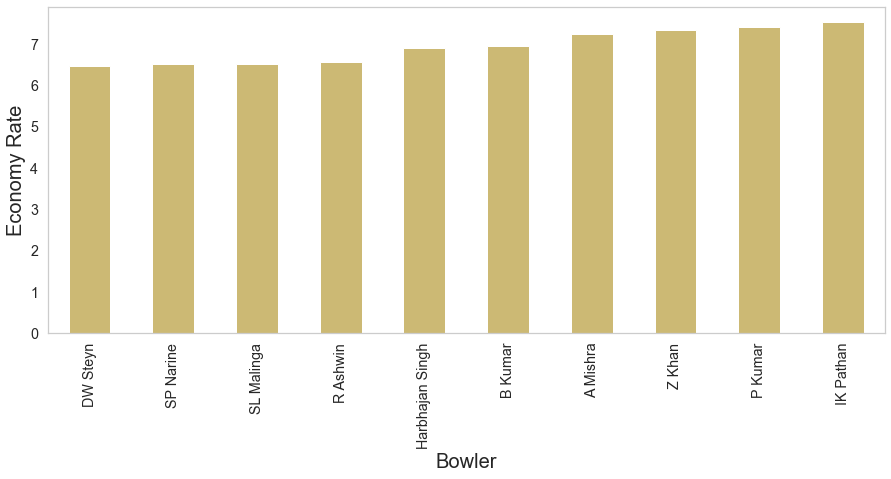

In [89]:
Economy = df_economy.sort_values('economy',ascending = True).head(10)
Economy.set_index("bowler", inplace = True)
plt.figure(figsize = (15, 6))
Economy['economy'].plot(kind='bar', color='y').grid(False)
plt.ylabel('Economy Rate',fontsize=20)
plt.xlabel('Bowler',fontsize=20)

<a id=section50305></a>
### 5.3.5 Overall Bowling Performance Comparison of top 10 wicket takers

Text(0.5, 1.0, 'Bowling Performance Overall')

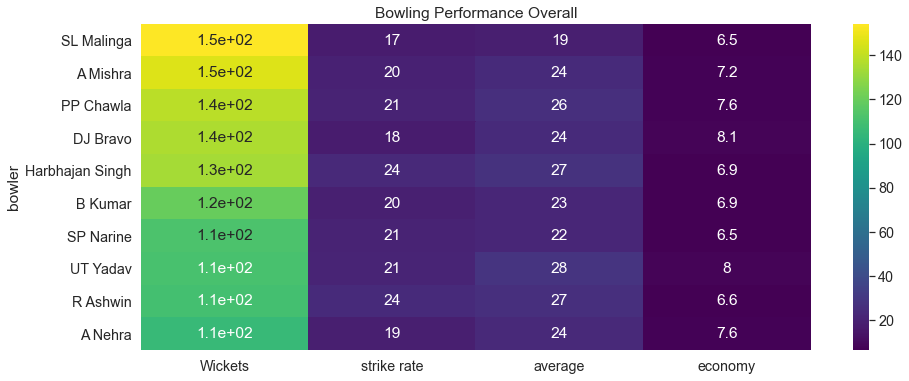

In [94]:
#Overall Bowling Performance Comparison of top 10 wicket takers

#Different types of dismissals
df_merge[df_merge.player_dismissed.notnull()].dismissal_kind.unique()
# 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled','stumped', 
# 'retired hurt', 'hit wicket', 'obstructing the field'

# Excluding 'run out', 'retired hurt', 'obstructing the field' to identify wickets taken by bowlers
a = df_merge[(df_merge.player_dismissed.notnull()) & (~df_merge.dismissal_kind.isin(['run out','retired hurt','obstructing the field']))]
Bowler = a.groupby(['bowler'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False)
Bowler.reset_index(inplace = True)

#Number of Deliveries bowled by a Bowler
Delivery = df_merge.groupby(['bowler'])['bowler'].agg(['count']).sort_values("count",ascending = False)
Delivery.reset_index(inplace = True)

#Number of Runs conceded by a Bowler
#wide_runs, noball_runs, batsman_runs are all added to the bowler's score.
RunBall = df_merge.groupby(['bowler'])['batsman_runs','wide_runs','noball_runs'].agg('sum')
RunBall.reset_index(inplace = True)
RunBall['Runs Conceded'] = RunBall['wide_runs'] + RunBall['noball_runs'] + RunBall['batsman_runs']
RunBall.drop(['batsman_runs','wide_runs','noball_runs'],axis = 1,inplace = True)

# #################################################################################

#Bowling Strike Rate Calculation
df_strike_rate = pd.merge(Bowler,Delivery,on = 'bowler', how = 'left')
df_strike_rate['strike rate'] = df_strike_rate['count_y']/df_strike_rate['count_x']
df_strike_rate = df_strike_rate.round(decimals=2)

# #################################################################################

#Bowling Average Calculation
df_average = pd.merge(Bowler,RunBall,on = 'bowler', how = 'left')
df_average['average'] = df_average['Runs Conceded']/df_average['count']
df_average = df_average.round(2)

# Merging Bowler and df_strike_rate
Bowler = pd.merge(Bowler,df_strike_rate, on = 'bowler')

#Dropping redundant Columns
Bowler.drop(['count_x','count_y'], axis = 1,inplace = True) 

# Merging Bowler and df_average
Bowler = pd.merge(Bowler,df_average, on = 'bowler')

#Dropping redundant Columns
Bowler.drop(['count_y','Runs Conceded'], axis = 1,inplace = True) 

# #################################################################################

#Economy Rate Calculation
df_economy = pd.merge(Delivery,RunBall,on = 'bowler', how = 'left')
df_economy['economy'] = (df_economy['Runs Conceded']/df_economy['count'])*6
df_economy = df_economy.round(2)

# Merging Bowler and df_economy
Bowler= pd.merge(Bowler,df_economy, on = 'bowler')

# #Dropping redundant Columns
Bowler.drop(['count','Runs Conceded'], axis = 1,inplace = True) 

#Renaming Columns
Bowler.rename(columns = {'count_x':'Wickets'}, inplace = True)

Bowler.set_index("bowler", inplace = True)

plt.figure(figsize=(15, 6))
sns.heatmap(Bowler.head(10), annot=True, cmap='viridis')
plt.title('Bowling Performance Overall')

<a id=section504></a>
## 5.4 Analysis Based on Fielding Performances

<a id=section50401></a>
### 5.4.1 Which fielder has the taken the maximum number of catches?

In [91]:
#Different types of dismissals
df_merge[df_merge.player_dismissed.notnull()].dismissal_kind.unique()
# 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled','stumped', 
# 'retired hurt', 'hit wicket', 'obstructing the field'

# dismissal_kind will be 'caught' and 'caught and bowled'
catch = df_merge[df_merge.dismissal_kind.isin([ 'caught','caught and bowled'])]
catch.groupby(['fielder'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False).head(10)

,count
fielder,
KD Karthik,102
SK Raina,95
MS Dhoni,87
AB de Villiers,87
RV Uthappa,80
RG Sharma,79
KA Pollard,74
DJ Bravo,69
V Kohli,68


Text(0.5, 0, 'Fielder')

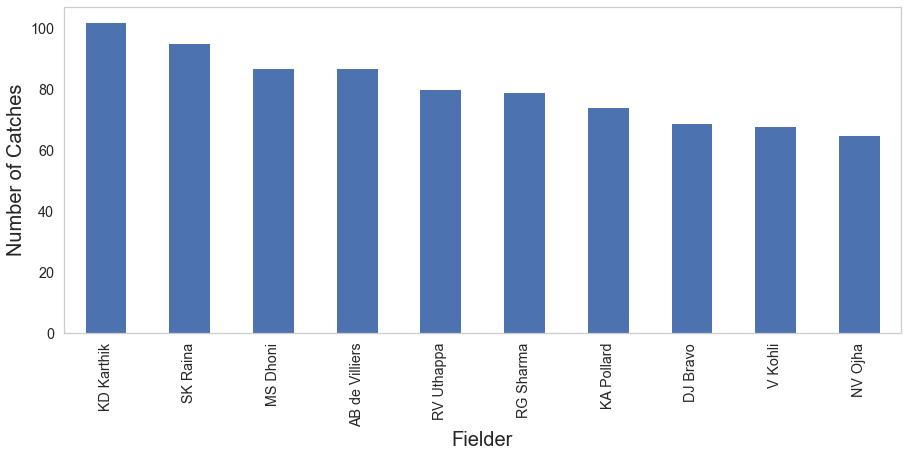

In [93]:
Catches = catch.groupby(['fielder'])['player_dismissed'].agg(['count']).sort_values("count",ascending = False).head(10)
plt.figure(figsize = (15, 6))
Catches['count'].plot(kind='bar', color='b').grid(False)
plt.ylabel('Number of Catches',fontsize=20)
plt.xlabel('Fielder',fontsize=20)

<a id=section6></a>
## 6. Conclusion

- It is analyzed that the when it comes to most match winning performances then Chris Gayle tops the chart as he has received the Man of the Match Award maximum number of times, followed by AB.de Villiers and Rohit Sharma. This simply means that when it comes to winning the matches these players make the maximum impact and are most sought after players in the bidding process 


- In the department of batting, overall best performers have been Suresh Raina, Virat Kohli and Rohit Sharma as their overall batting stats (runs, average, and strike rate) are balanced and at the top as well.

- In the department of bowling, SL Malinga stands ahead from all other bowlers as his stats speak for his overall performance in the IPL. He is the leading wicket taker, along with the best strike rate and average. In the economy front also he is at overall no 3. The other bowlers who have also been very impactful in the IPL are Amit Mishra and PP Chawla.

- Top catcher of the IPL has been KD Karthik, followed by SK Raina, so they also play an important role in their team's success in the IPL.

<a id=section601></a>
### 6.1 Actionable Insights

- Franchise must make sure that they manage to get **Chris Gayle, Virat Kohli and Rohit Sharma** if they need to increase their winning chances.

- To strengthen the batting of the team **Suresh Raina, Virat Kohli and Rohit Sharma** must be included in the teams. Suresh Raina and Rohit Sharma belong to Chennai Super Kings and Mumbai Indians Respectively who are 2 top teams in IPL so far.

- To strengthen the bowling of the team **SL Malinga** should be considered. No doubt why Mumbai Indians is the team with maximum no of titles under their name.